In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_70861_Z')

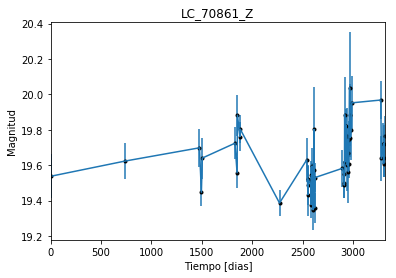

In [2]:
data = np.genfromtxt('LC_70861_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_70861_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

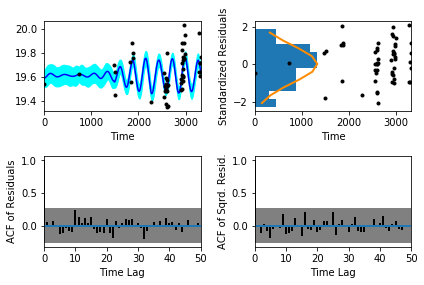

In [5]:
sample.assess_fit()

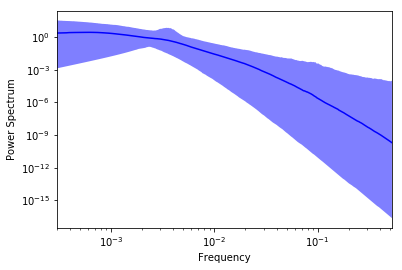

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_70861_Z')

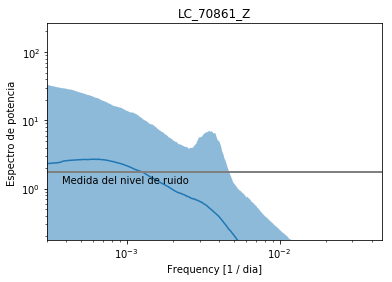

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_70861_Z')

Text(0.5,1,'Prediccion , valor esperado 70861_Z')

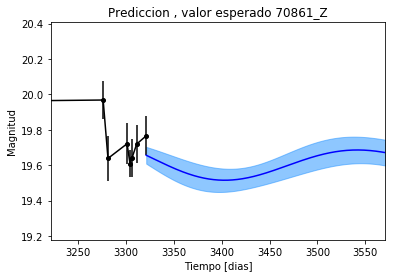

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 70861_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_70861_Z')

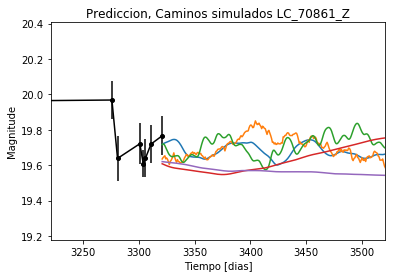

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_70861_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_70861_Z')

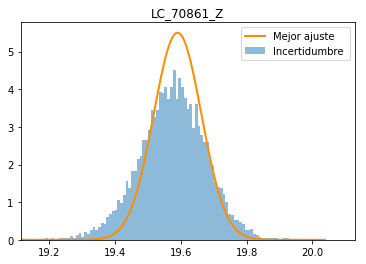

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_70861_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_Z')

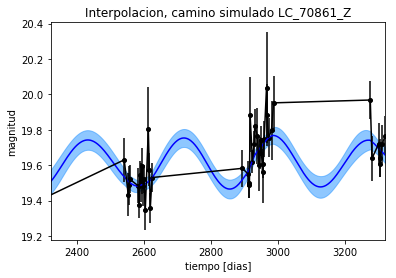

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_Z')

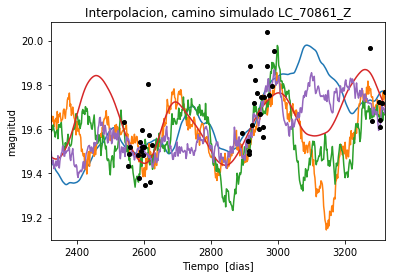

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 803.33178282
Median: 0.00755821011648
Standard deviation: 0.172757422683
68% credibility interval: [ 0.00075128  0.12741187]
95% credibility interval: [  3.36122734e-04   6.97040396e-01]
99% credibility interval: [  3.09234327e-04   9.82511665e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 648.174945184
Median: 0.00296618101505
Standard deviation: 0.0917766477592
68% credibility interval: [ 0.00055191  0.03957551]
95% credibility interval: [ 0.00032876  0.29621732]
99% credibility interval: [  3.07210887e-04   6.46389042e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 618.602584978
Median: 0.0128991701971
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1025.97947118
Median: 59.6783602532
Standard deviation: 1.7325659229
68% credibility interval: [ 57.89730725  60.94942594]
95% credibility interval: [ 55.42133159  62.63435611]
99% credibility interval: [ 53.52286908  63.39980869]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 609.161156033
Median: 0.530989195453
Standard deviation: 2.05885850874
68% credibility interval: [ 0.05009936  3.24845377]
95% credibility interval: [ 0.01412343  7.03945249]
99% credibility interval: [  9.71775672e-03   1.01451069e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 204.673542617
Median: 0.359665285554
Standard deviation: 9.32668334354
68% credibility interval: [ 0.01441787  8.53176717]
95% credibility interval: [  6.8

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6261.83450088
Median: 4.64037850604e-09
Standard deviation: 3.53188966418e+150
68% credibility interval: [  1.34213309e-44   1.39604894e+69]
95% credibility interval: [  2.67332952e-088   1.45226488e+124]
99% credibility interval: [  4.37008175e-128   1.08243815e+151]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2533.5187076
Median: 19.6109738801
Standard deviation: 0.0571588842645
68% credibility interval: [ 19.56077058  19.65518911]
95% credibility interval: [ 19.48863511  19.71910084]
99% credibility interval: [ 19.41776185  19.78370018]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 505.646831899
Median: 0.026405314484
Standard deviation: 0.249533879852
68% credibility interval: [ 0.          0.37392024]
95% credibility interval: [ 0.          0.92238798]
99% credibility interval: [ 0.          0.99951675]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 505.646831899
Median: 0.026405314484
Standard deviation: 0.249533879852
68% credibility interval: [ 0.          0.37392024]
95% credibility interval: [ 0.          0.92238798]
99% credibility interval: [ 0.          0.99951675]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 409.069873605
Median: 0.0
Standard deviation: 0.00140045709296
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1025.97947118
Median: 59.6783602532
Standard deviation: 1.7325659229
68% credibility interval: [ 57.89730725  60.94942594]
95% credibility interval: [ 55.42133159  62.63435611]
99% credibility interval: [ 53.52286908  63.39980869]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1786.50657841
Median: 0.016909853018
Standard deviation: 0.0201336586317
68% credibility interval: [ 0.00933533  0.03349808]
95% credibility interval: [ 0.00489021  0.0746183 ]
99% credibility interval: [ 0.00288825  0.12226304]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1519.36093061
Median: 1.00804719016
Standard deviation: 0.160495689706
68% credibility interval: [ 0.86762555  1.17863667]
95% credibility interval: [ 0.740625    1.38070337]
99% credibility interval: [ 0.68034698  1.51457086]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 734.840306994
Median: 1.60030873487e-05
Standard deviation: 0.157962006792
68% credibility interval: [  9.13816853e-71   5.42872679e-03]
95% credibility interval: [  1.39870938e-128   2.10204292e-001]
99% credibility interval: [  1.08891901e-154   9.47288213e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 803.33178282
Median: (-0.0474896347524-0.228545541588j)
Standard deviation: 1.90694709563
68% credibility interval: [-0.80055240-1.26145021j -0.00472043-0.07890776j]
95% credibility interval: [ -4.37963398e+00+0.j          -2.11192142e-03-0.02122269j]
99% credibility interval: [ -6.17330286e+00+0.j          -1.94297658e-03-0.02300604j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 648.174945184
Median: (-0.0186370649722+2.08200114715j)
Standard deviation: 1.67054891986
68% credibility interval: [-0.24866026+1.53832126j -0.00346777+0.j        ]
95% credibility interval: [-1.86118829+5.34534198j -0.00206568+0.00679492j]
99% credibility interval: [ -4.06138213e+00+2.90797362j  -1.93026293e-03+0.j        ]
Posterior summ